In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# k-최근접 이웃

#### 가장 가까운 k개의 이웃을 탐색한다.
#### 탐색된 이웃들 중 가장 많은 레이블을 예측 결과로 제시한다.

In [98]:
X,y = mglearn.datasets.make_forge()

print(f"X shape : {X.shape}\ny shape : {y.shape}")

X shape : (26, 2)
y shape : (26,)


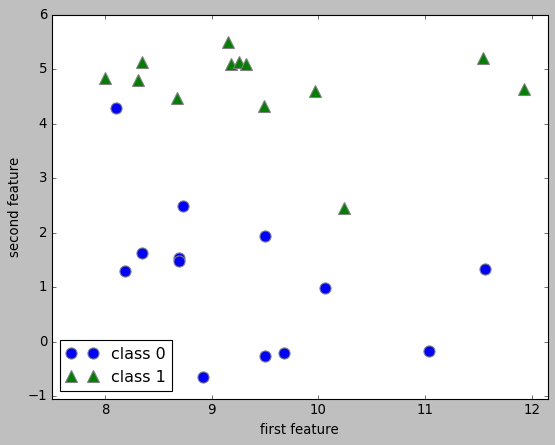

In [99]:
mglearn.discrete_scatter(X[:,0], X[:,1],y, markeredgewidth=1)
plt.legend(['class 0', 'class 1'], loc = 'best')
plt.xlabel("first feature")
plt.ylabel("second feature")
plt.show()

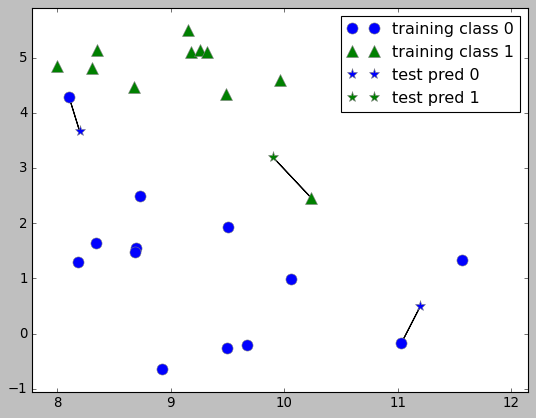

In [100]:
# knn 알고리즘이 어떻게 동작했는지 시각적으로 보여준다.

# 이웃이 1개 일때
mglearn.plots.plot_knn_classification(n_neighbors=1)

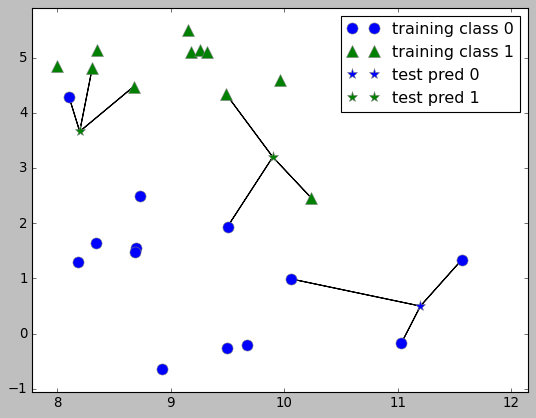

In [101]:
# 이웃이 3개 일 때
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=0)
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

print(f"train score : {clf.score(X_train, y_train):0.4f}")
print(f"test score : {clf.score(X_test, y_test):0.4f}")
print("="*30)
print("y_test : \n", y_test)
print("y_predicted : \n", clf.predict(X_test))

train score : 0.9474
test score : 0.8571
y_test : 
 [1 0 1 0 1 1 0]
y_predicted : 
 [1 0 1 0 1 0 0]


#### 이웃이 많아 질수록 복잡도는 낮아지고 일반화는 높아진다.

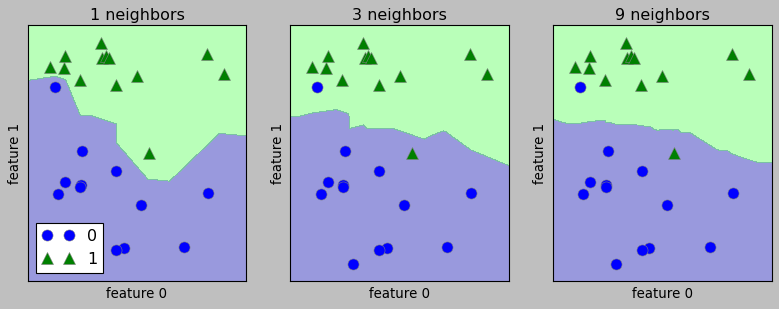

In [103]:
fig, axes = plt.subplots(1,3,figsize = (12,4))

n_neighbors = [1,3,9]
for n, ax in zip(n_neighbors, axes) :
    clf = KNeighborsClassifier(n_neighbors=n).fit(X,y)
    mglearn.discrete_scatter(X[:,0], X[:,1],y, ax = ax)
    mglearn.plots.plot_2d_separator(clf, X, fill = True, eps = 0.5, ax = ax, alpha = 0.4, cm = mglearn.cm3)
    ax.set_title(f"{n} neighbors")
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
    
axes[0].legend(loc = 3)

In [142]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
print(f"X shape : {cancer.data.shape}\ny shape : {cancer.target.shape}")
print("target :")
cnt = np.bincount(cancer.target)
for i in range(len(cancer.target_names)) :
    print(f"\t{cancer.target_names[i] : <10} => {cnt[i]}")

X shape : (569, 30)
y shape : (569,)
target :
	malignant  => 212
	benign     => 357


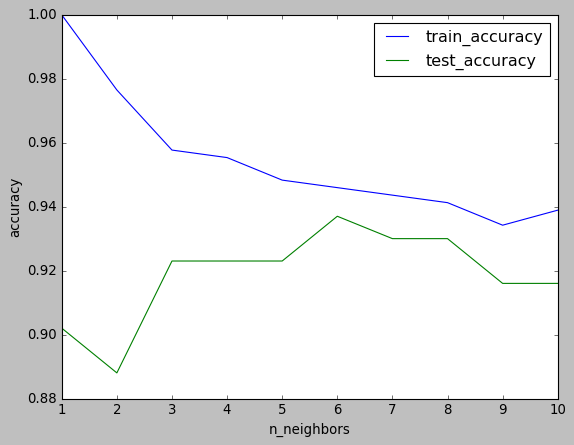

In [145]:


X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=66)

train_accuracy = []
test_accuracy = []

n_neighbors = range(1,11)

for n in n_neighbors :
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(X_train, y_train)
    
    train_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(n_neighbors, train_accuracy, label = 'train_accuracy')
plt.plot(n_neighbors, test_accuracy, label = 'test_accuracy')
plt.ylabel("accuracy")
plt.xlabel("n_neighbors")
plt.legend()


# K 최근접 이웃 회귀